In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100) 

In [2]:
path = '../data/medical_insurance.csv'

In [3]:
df = pd.read_csv( path )

df

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,128.17,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,68.39,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,41.74,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,0,28.2,Never,Occasional,0,0,0,1,115.0,74.0,102.5,4.98,PPO,Bronze,500,10,10,0,3.93,0.3516,1295.04,329.32,27.44,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
99996,54887,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,0,27.6,Never,Occasional,0,0,0,1,101.0,66.0,177.1,5.66,PPO,Silver,5000,20,4,0,3.94,0.2637,1451.73,424.21,35.35,0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99997,76821,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,0,29.8,Former,Weekly,7,0,0,1,128.0,83.0,118.8,5.52,PPO,Gold,500,30,9,0,4.14,0.4505,2291.00,534.90,44.58,8,312.56,2500.48,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
99998,861,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,2,21.9,Never,Occasional,4,0,0,2,110.0,73.0,134.9,5.25,POS,Bronze,2000,20,3,0,2.76,0.5604,1279.76,342.86,28.57,2,552.38,1104.76,1,0,0,0,0,0,0,0,0,0,1,0,0,2,2,1,0,0


## This dataset provides information about 100,000 individuals including their demographics, socioeconomic status, health conditions, lifestyle factors, insurance plans, and medical expenditures.

## It is designed to support machine learning and statistical modeling tasks, such as:

## Predicting annual medical costs (regression)
## Classifying individuals by risk level
## Clustering based on health and insurance profiles
## Analyzing relationships between demographics, health factors, and costs
## The dataset can be useful for insurance cost prediction, risk scoring, claims analysis, and healthcare analytics projects.

## This file contains :
## **Rows: **100,000
## **Columns: **54+

## 1. Demographics & Socioeconomic:
## person_id, age, sex, region, urban_rural, income, education, marital_status, employment_status, household_size, dependents

## 2. Lifestyle & Habits:
## bmi, smoker, alcohol_freq, exercise_frequency, sleep_hours, stress_level

## 3. Health & Clinical:
## hypertension, diabetes, copd, cardiovascular, cancer_history, kidney_disease, liver_disease, arthritis, mental_health, chronic_count, systolic_bp, diastolic_bp, ldl, hba1c, risk_score, is_high_risk

## 4. Healthcare Utilization & Procedures:
## visits_last_year, hospitalizations_last_3yrs, days_hospitalized_last_3yrs, medication_count, proc_imaging, proc_surgery, proc_psycho, proc_consult_count, proc_lab, had_major

## 5. Insurance & Policy:
## plan_type, network_tier, deductible, copay, policy_term_years, policy_changes_last_2yrs, provider_quality

## 6. Medical Costs & Claims:
## annual_medical_cost, annual_premium, monthly_premium, claims_count, avg_claim_amount, total_claims_paid

In [4]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_medical_cost,annual_premium,monthly_premium,claims_count,avg_claim_amount,total_claims_paid,chronic_count,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,2,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,6938.06,876.05,73.00,1,4672.59,4672.59,1,0,0,0,0,0,0,0,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,2,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,1632.61,445.10,37.09,4,297.27,1189.08,2,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,1,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,7661.01,1538.02,128.17,0,0.00,0.00,3,1,0,0,0,0,1,0,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,5130.27,820.63,68.39,0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,3,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1700.73,500.93,41.74,1,1002.24,1002.24,2,1,0,0,0,0,0,0,0,1,0,2,0,1,1,0,1,0


In [5]:
df.shape

(100000, 54)

In [6]:
df.isnull().sum()

person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [7]:
df.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [8]:
drop_cols = ['person_id','visits_last_year','annual_medical_cost','monthly_premium','avg_claim_amount','claims_count','total_claims_paid','chronic_count','proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count','proc_lab_count']

df_new = df.drop( columns=drop_cols )

In [9]:
df_new

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_premium,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,is_high_risk,had_major_procedure
0,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,876.05,0,0,0,0,0,0,0,0,1,0,0,0
1,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,445.10,0,0,0,0,0,0,0,0,1,1,1,0
2,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,1538.02,1,0,0,0,0,1,0,0,0,1,1,0
3,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,820.63,0,1,0,0,0,0,0,0,0,0,0,0
4,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,500.93,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,0,28.2,Never,Occasional,0,0,1,115.0,74.0,102.5,4.98,PPO,Bronze,500,10,10,0,3.93,0.3516,329.32,0,0,0,0,0,0,0,0,0,0,0,0
99996,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,0,27.6,Never,Occasional,0,0,1,101.0,66.0,177.1,5.66,PPO,Silver,5000,20,4,0,3.94,0.2637,424.21,0,0,0,0,0,0,0,0,0,0,0,0
99997,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,0,29.8,Former,Weekly,0,0,1,128.0,83.0,118.8,5.52,PPO,Gold,500,30,9,0,4.14,0.4505,534.90,1,0,0,0,0,0,0,0,0,0,0,0
99998,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,2,21.9,Never,Occasional,0,0,2,110.0,73.0,134.9,5.25,POS,Bronze,2000,20,3,0,2.76,0.5604,342.86,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df_new.columns

Index(['age', 'sex', 'region', 'urban_rural', 'income', 'education',
       'marital_status', 'employment_status', 'household_size', 'dependents',
       'bmi', 'smoker', 'alcohol_freq', 'hospitalizations_last_3yrs',
       'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp',
       'diastolic_bp', 'ldl', 'hba1c', 'plan_type', 'network_tier',
       'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs',
       'provider_quality', 'risk_score', 'annual_premium', 'hypertension',
       'diabetes', 'asthma', 'copd', 'cardiovascular_disease',
       'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis',
       'mental_health', 'is_high_risk', 'had_major_procedure'],
      dtype='object')

In [11]:
X = df_new.drop(columns='annual_premium')
y = df_new['annual_premium']

In [81]:
X.isnull().sum()

age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
policy_changes_last_2yrs           0
provider_quality                   0
r

In [65]:
def plot_bar_graph( data , x_col,title , width=8,height=4 ):
    
    plt.figure(figsize=(width,height))
   
    plt.title(title)
    
    ax = sns.countplot(data=data, x=x_col, palette='pastel')
   
    plt.xlabel(x_col.upper())
   
    plt.ylabel('Count')
   
    # Add count labels on top of bars
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height + 5, int(height), ha="center")
        
    plt.show()

## sex column

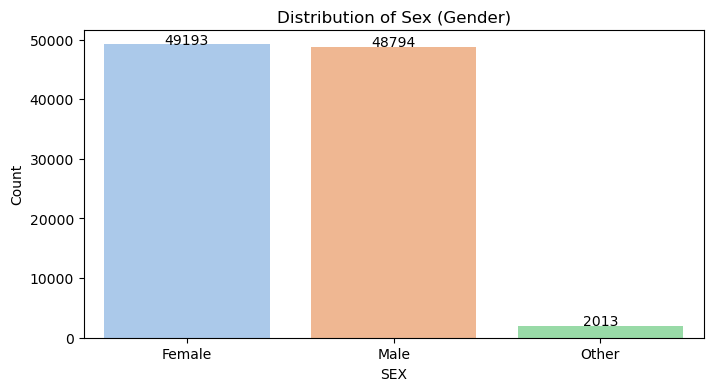

In [67]:
plot_bar_graph( df_new ,x_col='sex',title='Distribution of Sex (Gender)')

## Region

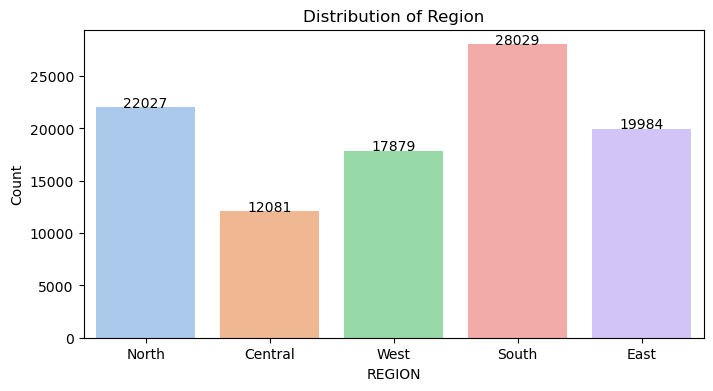

In [68]:
plot_bar_graph( df_new,x_col='region',title='Distribution of Region' )

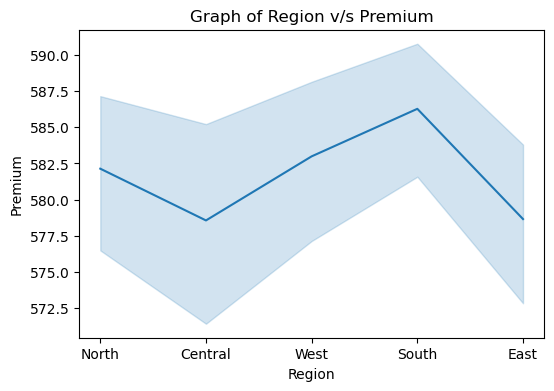

In [53]:
plt.figure(figsize=(6,4))
plt.title('Graph of Region v/s Premium')
sns.lineplot( data=df_new,x='region',y='annual_premium' , estimator='mean')
plt.xlabel('Region')
plt.ylabel('Premium')
plt.show()

## urban_rural

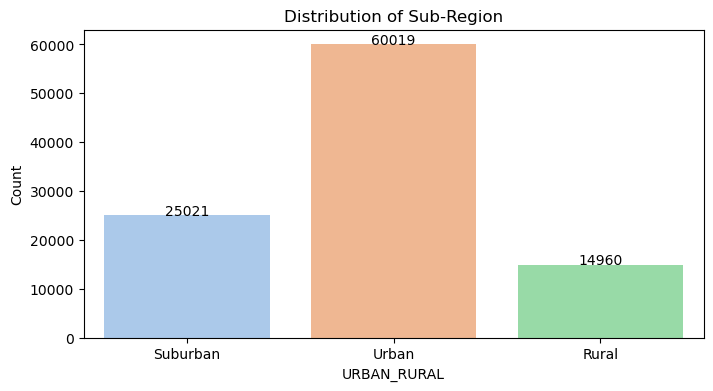

In [69]:
plot_bar_graph(data=df_new,x_col='urban_rural',title='Distribution of Sub-Region')

## Education

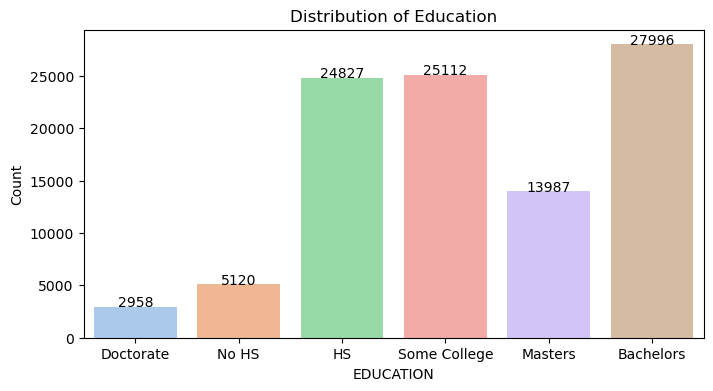

In [70]:
plot_bar_graph(data=df_new,x_col='education',title='Distribution of Education')

## marital_status

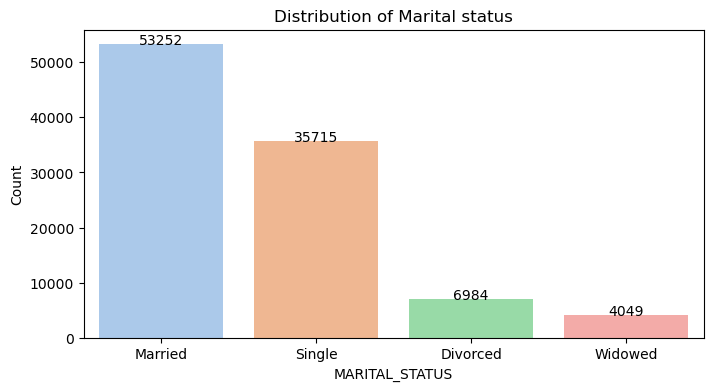

In [71]:
plot_bar_graph(data=df_new,x_col='marital_status',title='Distribution of Marital status')

## employment_status

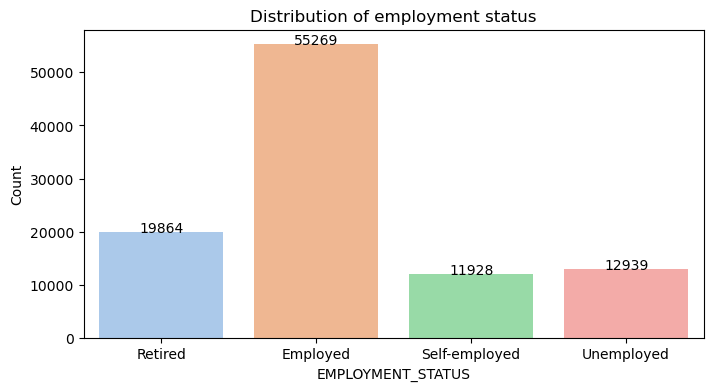

In [72]:
plot_bar_graph(data=df_new,x_col='employment_status',title='Distribution of employment status')

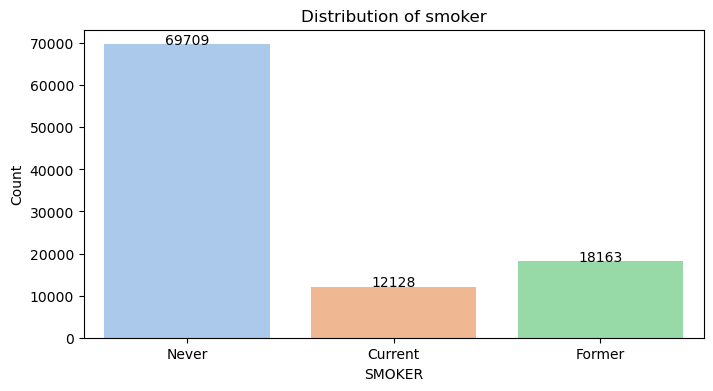

In [76]:
plot_bar_graph(data=df_new,x_col='smoker',title='Distribution of smoker')

## plan_type

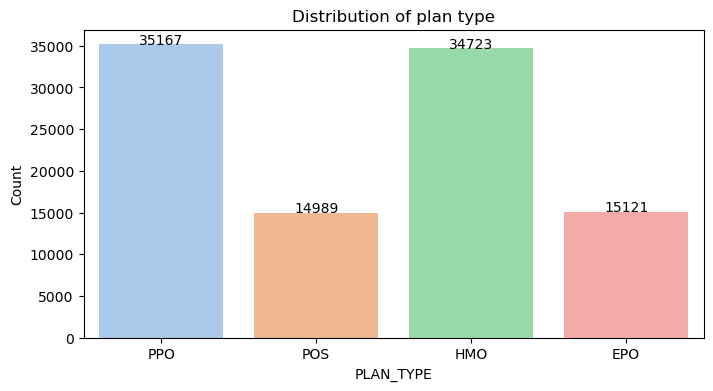

In [79]:
plot_bar_graph(data=df_new,x_col='plan_type',title='Distribution of plan type')

## alcohol_freq

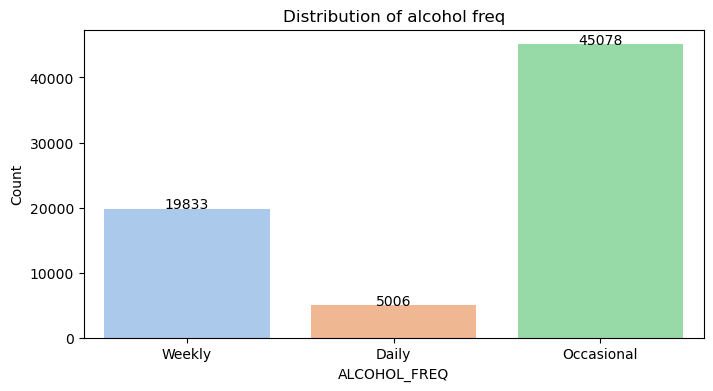

In [83]:
plot_bar_graph(data=df_new,x_col='alcohol_freq',title='Distribution of alcohol freq')

## network_tier

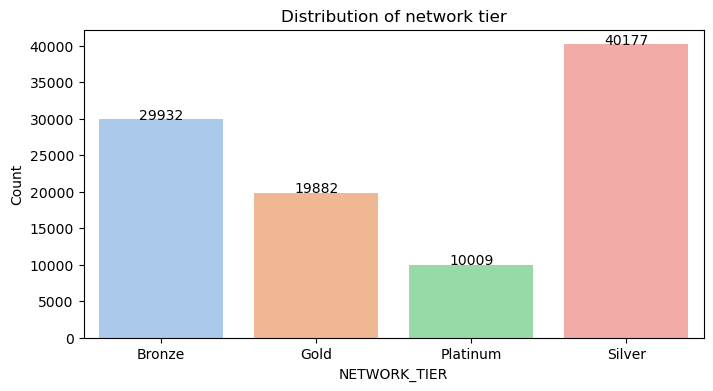

In [80]:
plot_bar_graph(data=df_new,x_col='network_tier',title='Distribution of network tier')

In [62]:
df_new.head()

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,annual_premium,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,is_high_risk,had_major_procedure
0,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,NaN,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,876.05,0,0,0,0,0,0,0,0,1,0,0,0
1,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,445.10,0,0,0,0,0,0,0,0,1,1,1,0
2,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,NaN,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,1538.02,1,0,0,0,0,1,0,0,0,1,1,0
3,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,NaN,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,820.63,0,1,0,0,0,0,0,0,0,0,0,0
4,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,500.93,1,0,0,0,0,0,0,0,1,0,1,0


In [90]:
X['alcohol_freq'] = X['alcohol_freq'].fillna( X['alcohol_freq'].mode() )

X.isnull().sum()

age                            0
sex                            0
region                         0
urban_rural                    0
income                         0
education                      0
marital_status                 0
employment_status              0
household_size                 0
dependents                     0
bmi                            0
smoker                         0
alcohol_freq                   0
hospitalizations_last_3yrs     0
days_hospitalized_last_3yrs    0
medication_count               0
systolic_bp                    0
diastolic_bp                   0
ldl                            0
hba1c                          0
plan_type                      0
network_tier                   0
deductible                     0
copay                          0
policy_term_years              0
policy_changes_last_2yrs       0
provider_quality               0
risk_score                     0
hypertension                   0
diabetes                       0
asthma    

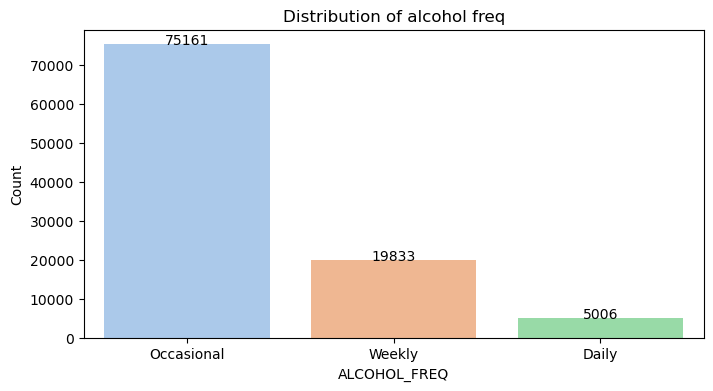

In [94]:
plot_bar_graph(data=X,x_col='alcohol_freq',title='Distribution of alcohol freq')

In [96]:
X.head()

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,is_high_risk,had_major_procedure
0,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,1,27.4,Never,Occasional,0,0,4,121.0,76.0,123.8,5.28,PPO,Bronze,1000,20,4,0,3.73,0.5714,0,0,0,0,0,0,0,0,1,0,0,0
1,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,1,26.6,Never,Weekly,0,0,3,131.0,79.0,97.3,4.82,POS,Gold,1000,10,1,0,3.10,1.0000,0,0,0,0,0,0,0,0,1,1,1,0
2,68,Male,North,Rural,40700.0,HS,Married,Retired,5,3,31.5,Never,Occasional,0,0,4,160.0,84.0,129.5,5.51,HMO,Platinum,500,20,10,0,3.90,1.0000,1,0,0,0,0,1,0,0,0,1,1,0
3,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,3,31.6,Never,Occasional,0,0,1,104.0,68.0,160.3,8.50,HMO,Silver,500,20,5,0,3.89,0.2857,0,1,0,0,0,0,0,0,0,0,0,0
4,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,0,30.5,Never,Daily,0,0,2,136.0,83.0,171.0,5.20,POS,Platinum,500,10,7,0,3.90,0.8681,1,0,0,0,0,0,0,0,1,0,1,0


In [125]:
cat_col = [col for col in X.columns if X[col].dtype == 'O' ]

num_col = [col for col in X.columns if X[col].dtype != 'O' and X[col].unique().size > 2 ]

bool_col = [col for col in X.columns if X[col].dtype != 'O' and X[col].unique().size <= 2 ]

In [127]:
X[cat_col].head()

,sex,region,urban_rural,education,marital_status,employment_status,smoker,alcohol_freq,plan_type,network_tier
0,Female,North,Suburban,Doctorate,Married,Retired,Never,Occasional,PPO,Bronze
1,Female,North,Urban,No HS,Married,Employed,Never,Weekly,POS,Gold
2,Male,North,Rural,HS,Married,Retired,Never,Occasional,HMO,Platinum
3,Male,North,Suburban,Some College,Married,Self-employed,Never,Occasional,HMO,Silver
4,Male,Central,Suburban,Doctorate,Married,Self-employed,Never,Daily,POS,Platinum


In [128]:
X[num_col].head()

,age,income,household_size,dependents,bmi,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score
0,52,22700.0,3,1,27.4,0,0,4,121.0,76.0,123.8,5.28,1000,20,4,0,3.73,0.5714
1,79,12800.0,3,1,26.6,0,0,3,131.0,79.0,97.3,4.82,1000,10,1,0,3.10,1.0000
2,68,40700.0,5,3,31.5,0,0,4,160.0,84.0,129.5,5.51,500,20,10,0,3.90,1.0000
3,15,15600.0,5,3,31.6,0,0,1,104.0,68.0,160.3,8.50,500,20,5,0,3.89,0.2857
4,53,89600.0,2,0,30.5,0,0,2,136.0,83.0,171.0,5.20,500,10,7,0,3.90,0.8681


In [129]:
X[bool_col].head()

,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,is_high_risk,had_major_procedure
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,1,0
2,1,0,0,0,0,1,0,0,0,1,1,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,1,0


## convert values into categorical values

In [158]:
for col in cat_col:
    X[col] = X[col].apply(lambda val: val.lower() if isinstance(val, str) else val)

In [159]:
X

,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,dependents,bmi,smoker,alcohol_freq,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,plan_type,network_tier,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,is_high_risk,had_major_procedure
0,52,female,north,suburban,22700.0,doctorate,married,retired,3,1,27.4,never,occasional,0,0,4,121.0,76.0,123.8,5.28,ppo,bronze,1000,20,4,0,3.73,0.5714,0,0,0,0,0,0,0,0,1,0,0,0
1,79,female,north,urban,12800.0,no hs,married,employed,3,1,26.6,never,weekly,0,0,3,131.0,79.0,97.3,4.82,pos,gold,1000,10,1,0,3.10,1.0000,0,0,0,0,0,0,0,0,1,1,1,0
2,68,male,north,rural,40700.0,hs,married,retired,5,3,31.5,never,occasional,0,0,4,160.0,84.0,129.5,5.51,hmo,platinum,500,20,10,0,3.90,1.0000,1,0,0,0,0,1,0,0,0,1,1,0
3,15,male,north,suburban,15600.0,some college,married,self-employed,5,3,31.6,never,occasional,0,0,1,104.0,68.0,160.3,8.50,hmo,silver,500,20,5,0,3.89,0.2857,0,1,0,0,0,0,0,0,0,0,0,0
4,53,male,central,suburban,89600.0,doctorate,married,self-employed,2,0,30.5,never,daily,0,0,2,136.0,83.0,171.0,5.20,pos,platinum,500,10,7,0,3.90,0.8681,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,50,male,west,urban,127200.0,no hs,married,employed,2,0,28.2,never,occasional,0,0,1,115.0,74.0,102.5,4.98,ppo,bronze,500,10,10,0,3.93,0.3516,0,0,0,0,0,0,0,0,0,0,0,0
99996,42,male,east,suburban,21600.0,hs,married,employed,2,0,27.6,never,occasional,0,0,1,101.0,66.0,177.1,5.66,ppo,silver,5000,20,4,0,3.94,0.2637,0,0,0,0,0,0,0,0,0,0,0,0
99997,41,male,west,rural,81900.0,hs,divorced,unemployed,1,0,29.8,former,weekly,0,0,1,128.0,83.0,118.8,5.52,ppo,gold,500,30,9,0,4.14,0.4505,1,0,0,0,0,0,0,0,0,0,0,0
99998,51,female,south,urban,43400.0,doctorate,single,unemployed,3,2,21.9,never,occasional,0,0,2,110.0,73.0,134.9,5.25,pos,bronze,2000,20,3,0,2.76,0.5604,0,0,0,0,0,0,0,0,0,1,0,0


In [160]:
pd.concat( [ X[cat_col] , X[num_col] , X[bool_col] ], axis=1  )

,sex,region,urban_rural,education,marital_status,employment_status,smoker,alcohol_freq,plan_type,network_tier,age,income,household_size,dependents,bmi,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,systolic_bp,diastolic_bp,ldl,hba1c,deductible,copay,policy_term_years,policy_changes_last_2yrs,provider_quality,risk_score,hypertension,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,is_high_risk,had_major_procedure
0,female,north,suburban,doctorate,married,retired,never,occasional,ppo,bronze,52,22700.0,3,1,27.4,0,0,4,121.0,76.0,123.8,5.28,1000,20,4,0,3.73,0.5714,0,0,0,0,0,0,0,0,1,0,0,0
1,female,north,urban,no hs,married,employed,never,weekly,pos,gold,79,12800.0,3,1,26.6,0,0,3,131.0,79.0,97.3,4.82,1000,10,1,0,3.10,1.0000,0,0,0,0,0,0,0,0,1,1,1,0
2,male,north,rural,hs,married,retired,never,occasional,hmo,platinum,68,40700.0,5,3,31.5,0,0,4,160.0,84.0,129.5,5.51,500,20,10,0,3.90,1.0000,1,0,0,0,0,1,0,0,0,1,1,0
3,male,north,suburban,some college,married,self-employed,never,occasional,hmo,silver,15,15600.0,5,3,31.6,0,0,1,104.0,68.0,160.3,8.50,500,20,5,0,3.89,0.2857,0,1,0,0,0,0,0,0,0,0,0,0
4,male,central,suburban,doctorate,married,self-employed,never,daily,pos,platinum,53,89600.0,2,0,30.5,0,0,2,136.0,83.0,171.0,5.20,500,10,7,0,3.90,0.8681,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,male,west,urban,no hs,married,employed,never,occasional,ppo,bronze,50,127200.0,2,0,28.2,0,0,1,115.0,74.0,102.5,4.98,500,10,10,0,3.93,0.3516,0,0,0,0,0,0,0,0,0,0,0,0
99996,male,east,suburban,hs,married,employed,never,occasional,ppo,silver,42,21600.0,2,0,27.6,0,0,1,101.0,66.0,177.1,5.66,5000,20,4,0,3.94,0.2637,0,0,0,0,0,0,0,0,0,0,0,0
99997,male,west,rural,hs,divorced,unemployed,former,weekly,ppo,gold,41,81900.0,1,0,29.8,0,0,1,128.0,83.0,118.8,5.52,500,30,9,0,4.14,0.4505,1,0,0,0,0,0,0,0,0,0,0,0
99998,female,south,urban,doctorate,single,unemployed,never,occasional,pos,bronze,51,43400.0,3,2,21.9,0,0,2,110.0,73.0,134.9,5.25,2000,20,3,0,2.76,0.5604,0,0,0,0,0,0,0,0,0,1,0,0


## Encoding the categorical columns and scale the numerical columns

In [137]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder , StandardScaler

In [152]:
ohe = OneHotEncoder( drop='first' , dtype=np.int32 )

scale = StandardScaler(  )

In [161]:
ct = ColumnTransformer(
    transformers=[
    ( 'encoder' , ohe , cat_col ),
    ( 'scale' , scale , num_col )
],
    remainder='passthrough'
)

In [140]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=42)

In [164]:
X_train_transformed = ct.fit_transform( X_train )

pd.DataFrame(X_train_transformed , columns=ct.get_feature_names_out()).head()

,encoder__sex_male,encoder__sex_other,encoder__region_east,encoder__region_north,encoder__region_south,encoder__region_west,encoder__urban_rural_suburban,encoder__urban_rural_urban,encoder__education_doctorate,encoder__education_hs,encoder__education_masters,encoder__education_no hs,encoder__education_some college,encoder__marital_status_married,encoder__marital_status_single,encoder__marital_status_widowed,encoder__employment_status_retired,encoder__employment_status_self-employed,encoder__employment_status_unemployed,encoder__smoker_former,encoder__smoker_never,encoder__alcohol_freq_occasional,encoder__alcohol_freq_weekly,encoder__plan_type_hmo,encoder__plan_type_pos,encoder__plan_type_ppo,encoder__network_tier_gold,encoder__network_tier_platinum,encoder__network_tier_silver,scale__age,scale__income,scale__household_size,scale__dependents,scale__bmi,scale__hospitalizations_last_3yrs,scale__days_hospitalized_last_3yrs,scale__medication_count,scale__systolic_bp,scale__diastolic_bp,scale__ldl,scale__hba1c,scale__deductible,scale__copay,scale__policy_term_years,scale__policy_changes_last_2yrs,scale__provider_quality,scale__risk_score,remainder__hypertension,remainder__diabetes,remainder__asthma,remainder__copd,remainder__cardiovascular_disease,remainder__cancer_history,remainder__kidney_disease,remainder__liver_disease,remainder__arthritis,remainder__mental_health,remainder__is_high_risk,remainder__had_major_procedure
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.341414,-0.615146,-0.399362,0.109494,-0.358296,-0.306902,-0.271846,-0.195628,1.643149,2.850880,0.518198,-0.479389,-0.715053,1.021132,0.516102,-0.222999,0.405245,0.251755,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.029445,0.275589,0.532333,0.109494,0.062811,-0.306902,-0.271846,0.630365,-0.115780,-0.405684,0.263616,-0.089915,-0.715053,0.048514,-0.180868,-0.222999,1.601863,0.734310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.779252,-0.755788,-0.399362,-0.943199,-2.062779,-0.306902,-0.271846,0.630365,1.382567,1.840222,-0.824141,0.228745,-0.223554,0.048514,-0.529354,-0.222999,-1.347547,0.558690,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.529059,0.318208,-1.331056,-0.943199,3.231144,-0.306902,-0.271846,1.456358,0.079656,0.268088,-0.731566,-0.455784,-0.223554,-0.924104,-0.529354,-0.222999,0.540075,-0.055181,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.278865,-0.732347,-0.399362,0.109494,0.724552,-0.306902,-0.271846,-1.021621,-0.506653,1.054155,0.369416,-1.317347,-0.223554,0.048514,-1.226324,-0.222999,0.371538,-0.230801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [165]:
X_train_transformed.shape

(75000, 59)

In [166]:
X_test_transformed = ct.transform( X_test )

In [168]:
X_test_transformed.shape

(25000, 59)

In [169]:
from sklearn.ensemble import RandomForestRegressor

In [170]:
rfr = RandomForestRegressor()

In [171]:
rfr.fit(X_train_transformed , y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [173]:
y_test_pred = rfr.predict( X_test_transformed  )

In [174]:
from sklearn.metrics import mean_squared_error,r2_score,median_absolute_error

In [176]:
print(f'The mean squared error:{mean_squared_error(y_test , y_test_pred)}')

print(f'The mean absolute error:{median_absolute_error(y_test , y_test_pred)}')

print(f'The accuracy:{r2_score(y_test , y_test_pred)*100}')

The mean squared error:143891.81873519285
The mean absolute error:160.47934999999978
The accuracy:13.012121617317652
